<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/Precipitation_Monthly_Annual_Data_Exploration_Ravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precipitation Data Exploration
Author: Ravi Kohli

Date: November 15th, 2020

College: Christ Church

Data was collected from Radcliffe Observatory:
Oxford Weather and Climate since 1767 by Stephen Burt and Tim Burt, published by Oxford University Press, 2019.

This data is available at
https://www.geog.ox.ac.uk/research/climate/rms/monthly-annual.html



Dataset documentation explanation of the columns: (taken from documentation)
- YYYY - Year (four digits). First record 1767
- Jan : Monthly total precipitation at the Radcliffe Observatory, Oxford. **Units millimetres and tenths.**
- Feb, Mar etc and similarly for each month of the year (will be a column for each month)
- Annual : Total annual precipitation at the Radcliffe Observatory, Oxford (sum of 12 monthly values). **Units millimetres and tenths.**
- % 1981-2010 average : Annual total as a percentage of the 1981-2010 average, calculated to 1 decimal place.
- YYYY - Year (four digits) repeated. First record 1767
- Winter - Seasonal total precipitation at the Radcliffe Observatory, Oxford. **Units millimetres and tenths**. Winter is the sum of Dec, Jan, Feb monthly totals, dated to the January year. Units millimetres and tenths. (Winter 1767 is missing as there is no monthly precipitation total for December 1766)
- Spring : ditto, for March-April-May. **Units millimetres and tenths**
- Summer : ditto, June-July-August. **Units millimetres and tenths**
- Autumn : ditto, Sept, Oct, Nov. **Units millimetres and tenths**


**NOTE:** if running this notebook on your own computer, then just ignore this cell below

In [1]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Retrieving the precipitation data
path = '/content/drive/My Drive/3YP/data/'    # when running in a notebook in colab
#path = '../data/'                            # when running from an external notebook

filename = "monthly-pptn-1767-to-date-mm.csv" # the name of the csv file
df = pd.read_csv(path+filename)               # converting the csv file to a dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Oxford Radcliffe - monthly rainfall totals, mm  258 non-null    object
 1   Unnamed: 1                                      256 non-null    object
 2   Unnamed: 2                                      256 non-null    object
 3   Unnamed: 3                                      256 non-null    object
 4   Unnamed: 4                                      256 non-null    object
 5   Unnamed: 5                                      255 non-null    object
 6   Unnamed: 6                                      255 non-null    object
 7   Unnamed: 7                                      255 non-null    object
 8   Unnamed: 8                                      255 non-null    object
 9   Unnamed: 9                                      255 no

List of observations and pre-processing steps to make the data usable:
- First row was full of NaN's : we will remove it
- Column names are in the second row of the dataframe : we will assign the column names to those
- The 'YYYY' column is a repeated column : we will remove this duplicate
- Rows 256 - 257 is full of NaN's : we will remove them
- Rows 258 - 259 are full of average values : we will create a separate dataframe to store those
- Data is all in strings : we can convert the data to ints and float as required

*Row references are given with respect to original indexing

## Data Preprocessing

In [5]:
df.columns = df.iloc[1].values                              # the second row of the data frame was actually the column names
df.rename(columns={" Annual": "Annual"}, inplace = True)    # renaming the " Annual" column to "Annual"

In [6]:
df                                # just viewing the change

,YYYY,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Annual,% 1981-2010 average,YYYY,Winter,Spring,Summer,Autumn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YYYY,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Annual,% 1981-2010 average,YYYY,Winter,Spring,Summer,Autumn
2,1767,68.7,88.1,54.9,17.7,100,74.6,124.9,93.2,70.2,113.8,27.6,7.7,841.4,127.4,1767,NaN,172.6,292.7,211.6
3,1768,68.3,62.2,4.1,79.6,39.2,131.9,76.7,39.9,170.9,105.8,85,69,932.7,141.3,1768,138.2,123,248.6,361.6
4,1769,34.6,52.3,29.5,19.6,57.1,88.8,47.7,58.1,123.5,13.8,54.7,65.6,645.3,97.7,1769,155.9,106.3,194.6,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,Averages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,1767-2018,52.4,41.1,41.2,43.4,51.4,52.6,58.9,57.9,58.6,64.4,62,55.7,639.5,NaN,NaN,148.9,135.9,169.3,185


In [7]:
df = df.loc[:, ~df.columns.duplicated()]         # removing the duplicate 'YYYY' column

In [8]:
df = df[2:]                                      # the first two rows were NaN's/column names so we don't need them

In [9]:
df[df.columns[1:]] = df[df.columns[1: ]].apply(pd.to_numeric)    # chaging the data to floats 

In [10]:
df.drop([256, 257], inplace = True)               # removing the row of Nan's

In [11]:
df.reset_index(drop = True, inplace = True)       # restarting the index counter from 0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YYYY                 256 non-null    object 
 1   Jan                  255 non-null    float64
 2   Feb                  255 non-null    float64
 3   Mar                  255 non-null    float64
 4   Apr                  255 non-null    float64
 5   May                  254 non-null    float64
 6   June                 254 non-null    float64
 7   July                 254 non-null    float64
 8   Aug                  254 non-null    float64
 9   Sept                 254 non-null    float64
 10  Oct                  254 non-null    float64
 11  Nov                  254 non-null    float64
 12  Dec                  254 non-null    float64
 13  Annual               254 non-null    float64
 14  % 1981-2010 average  252 non-null    float64
 15  Winter               253 non-null    flo

In [13]:
average_precipitation_df = df[254:]               # creating the average df
df = df[:254]                                     # cutting those final rows off of the dataframe

In [14]:
df['YYYY'] =  pd.to_datetime(df['YYYY'])                          # convert the column to datetime
#df['YYYY'] = pd.to_numeric(df['YYYY'], downcast = 'integer')     # other option is to convert the data to integere

In [15]:
df

,YYYY,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Annual,% 1981-2010 average,Winter,Spring,Summer,Autumn
0,1767-01-01,68.7,88.1,54.9,17.7,100.0,74.6,124.9,93.2,70.2,113.8,27.6,7.7,841.4,127.4,NaN,172.6,292.7,211.6
1,1768-01-01,68.3,62.2,4.1,79.6,39.2,131.9,76.7,39.9,170.9,105.8,85.0,69.0,932.7,141.3,138.2,123.0,248.6,361.6
2,1769-01-01,34.6,52.3,29.5,19.6,57.1,88.8,47.7,58.1,123.5,13.8,54.7,65.6,645.3,97.7,155.9,106.3,194.6,192.0
3,1770-01-01,20.1,28.8,60.3,24.2,60.0,94.2,19.1,26.1,64.9,24.2,192.4,74.6,688.9,104.3,114.5,144.5,139.4,281.5
4,1771-01-01,13.8,22.8,37.0,24.2,21.8,65.8,28.8,62.9,22.0,105.1,13.3,28.3,445.9,67.5,111.1,83.0,157.6,140.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2016-01-01,83.7,47.6,74.2,53.2,81.4,95.7,3.6,41.2,41.7,26.5,78.2,32.1,659.1,99.8,193.3,208.8,140.5,146.4
250,2017-01-01,64.1,42.8,44.1,5.4,63.6,30.5,62.3,62.8,60.7,17.1,48.4,76.1,577.9,87.5,139.0,113.1,155.6,126.2
251,2018-01-01,58.6,24.1,83.4,52.8,86.2,2.5,23.2,43.2,30.3,50.1,61.9,67.7,584.0,88.4,158.8,222.4,68.9,142.3
252,2019-01-01,28.6,40.4,35.5,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(df.dtypes)        # showing the data types are as we expected

YYYY                   datetime64[ns]
Jan                           float64
Feb                           float64
Mar                           float64
Apr                           float64
May                           float64
June                          float64
July                          float64
Aug                           float64
Sept                          float64
Oct                           float64
Nov                           float64
Dec                           float64
Annual                        float64
% 1981-2010 average           float64
Winter                        float64
Spring                        float64
Summer                        float64
Autumn                        float64
dtype: object


In [17]:
# pickle our data so it can be used in another notebook
import pickle
path = '/content/drive/My Drive/3YP/data/'
filename_real = 'precipitation_data_processed'
outfile_real = open(path+filename_real, 'wb')
pickle.dump(df, outfile_real)
outfile_real.close()

# Exploratory Analysis

### Annual

Now we can begin to produce some initial exploratory plots

In [18]:
exploratory_df = df

In [19]:
exploratory_df['SMA_Annual_20'] = exploratory_df.Annual.rolling(20).mean()     # calculating a 10 year moving average

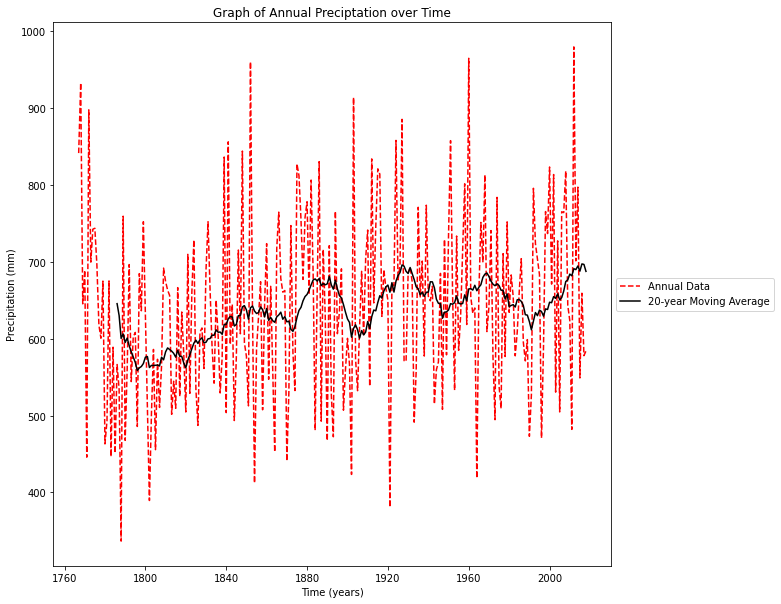

In [20]:
# Annual Graph over time
exp_fig, exp_ax = plt.subplots(figsize = (10, 10))
exp_ax.plot(exploratory_df['YYYY'], exploratory_df['Annual'], 'r--', label = 'Annual Data')
exp_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_Annual_20'], color = 'k', label = '20-year Moving Average')   
exp_ax.set(title = 'Graph of Annual Preciptation over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
exp_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)

From this graph, we can see that average precipitation over time shows an increasing trend. This is not a surprise. We can consider the implications for this on the river level

## Seasonal

We can now investigate seasonal variations over time

### Summer

In [21]:
exploratory_df['Summer'] = exploratory_df[['June', 'July', "Aug"]].sum(axis = 1)      # Summer column in dataframe
exploratory_df['Summer_SMA_20'] = exploratory_df.Summer.rolling(20).mean()            # calculating a 20-year rolling mean

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


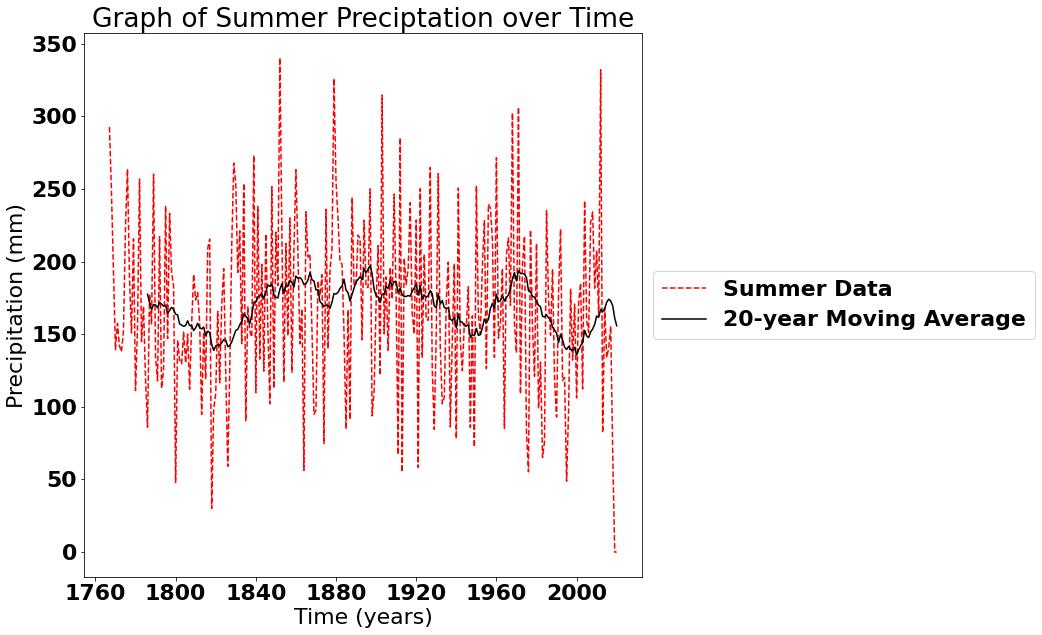

In [22]:
# Summer Graph over time
summer_fig, summer_ax = plt.subplots(figsize = (10, 10))
summer_ax.plot(exploratory_df['YYYY'], exploratory_df['Summer'], 'r--', label = 'Summer Data')
summer_ax.plot(exploratory_df['YYYY'], exploratory_df['Summer_SMA_20'], color = 'k', label = '20-year Moving Average')   
summer_ax.set(title = 'Graph of Summer Preciptation over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
summer_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)

## Autumn

In [23]:
exploratory_df['Autumn'] = exploratory_df[['Sept', 'Oct', 'Nov']].sum(axis = 1)       # Autumn column in dataframe
exploratory_df['Autumn_SMA_20'] = exploratory_df.Autumn.rolling(20).mean()            # calculating a 20-year rolling mean

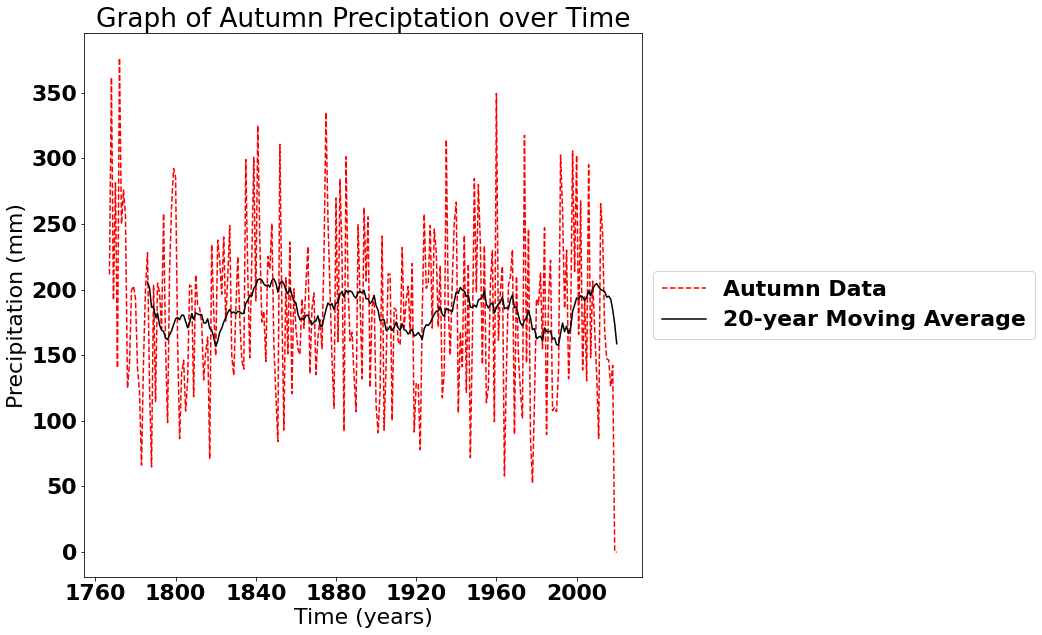

In [24]:
# Autumn Graph over time
autumn_fig, autumn_ax = plt.subplots(figsize = (10, 10))
autumn_ax.plot(exploratory_df['YYYY'], exploratory_df['Autumn'], 'r--', label = 'Autumn Data')
autumn_ax.plot(exploratory_df['YYYY'], exploratory_df['Autumn_SMA_20'], color = 'k', label = '20-year Moving Average')   
autumn_ax.set(title = 'Graph of Autumn Preciptation over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
autumn_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)

### Winter

In [25]:
exploratory_df['Winter'] = exploratory_df[['Dec', 'Jan', 'Feb']].sum(axis = 1)        # Winter column in dataframe
exploratory_df['Winter_SMA_20'] = exploratory_df.Winter.rolling(20).mean()            # calculating a 20-year rolling mean

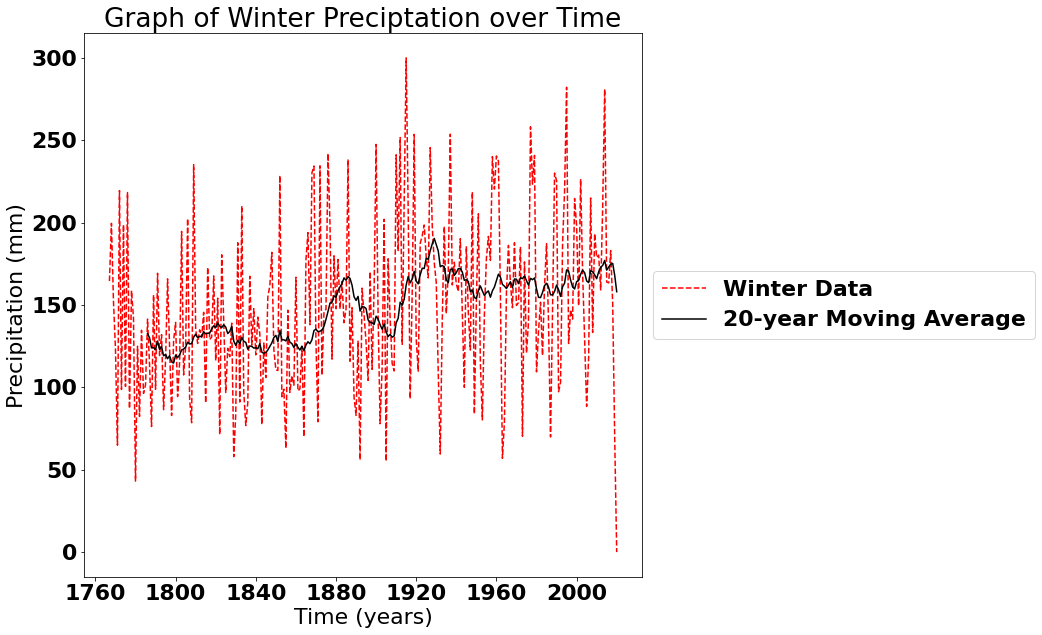

In [26]:
# Winter Graph over time
winter_fig, winter_ax = plt.subplots(figsize = (10, 10))
winter_ax.plot(exploratory_df['YYYY'], exploratory_df['Winter'], 'r--', label = 'Winter Data')
winter_ax.plot(exploratory_df['YYYY'], exploratory_df['Winter_SMA_20'], color = 'k', label = '20-year Moving Average')   
winter_ax.set(title = 'Graph of Winter Preciptation over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
winter_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)

### Spring

In [27]:
exploratory_df['Spring'] = exploratory_df[['Mar', 'Apr', 'May']].sum(axis = 1)        # Spring column in dataframe
exploratory_df['Spring_SMA_20'] = exploratory_df.Spring.rolling(20).mean()            # calculating a 20-year rolling mean

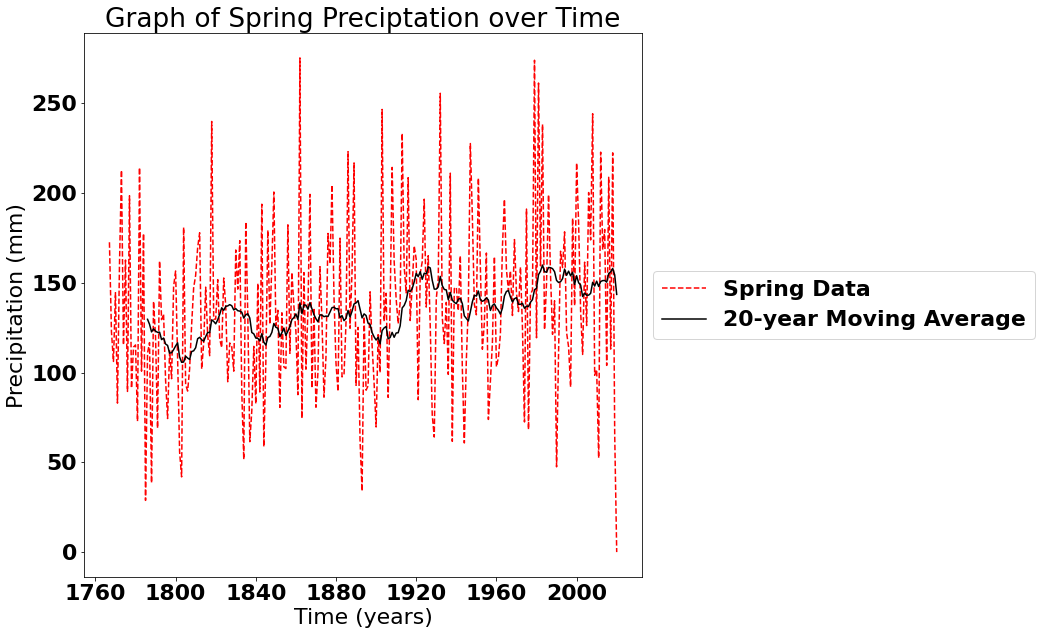

In [28]:
# Winter Graph over time
spring_fig, spring_ax = plt.subplots(figsize = (10, 10))
spring_ax.plot(exploratory_df['YYYY'], exploratory_df['Spring'], 'r--', label = 'Spring Data')
spring_ax.plot(exploratory_df['YYYY'], exploratory_df['Spring_SMA_20'], color = 'k', label = '20-year Moving Average')   
spring_ax.set(title = 'Graph of Spring Preciptation over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
spring_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)

## Monthly

Investigation of individual months over time

### January

In [29]:
exploratory_df['SMA_Jan_20'] = exploratory_df.Jan.rolling(20).mean()     # calculating a 20 year moving average for January

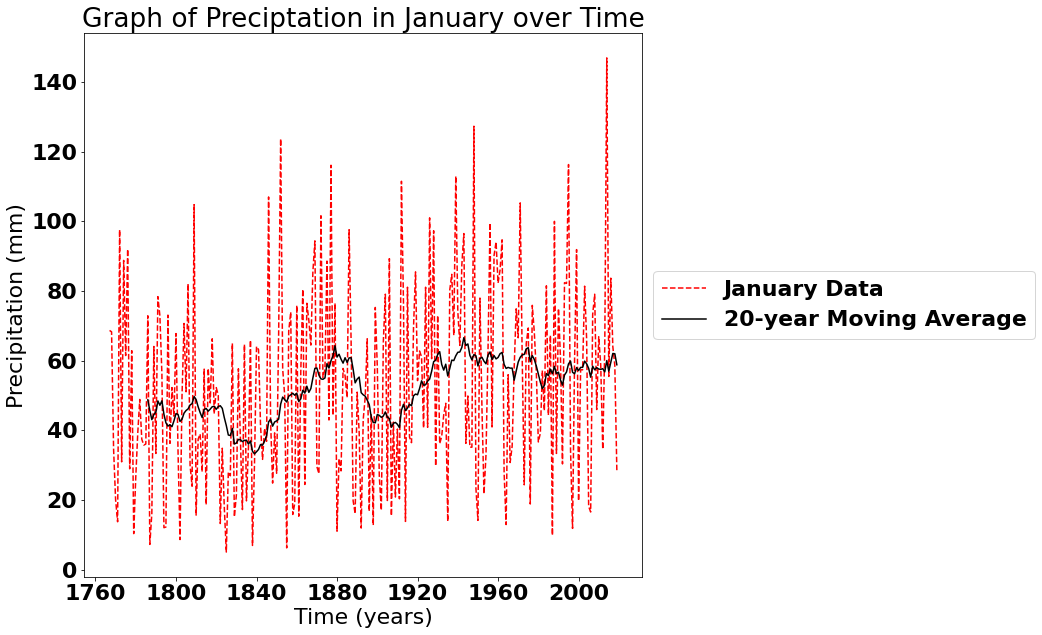

In [30]:
# Let us consider each of the months by themselves
jan_fig, jan_ax = plt.subplots(figsize = (10, 10))
jan_ax.plot(exploratory_df['YYYY'], exploratory_df['Jan'], 'r--', label = 'January Data')
jan_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_Jan_20'], color = 'k', label = '20-year Moving Average')    
jan_ax.set(title = 'Graph of Preciptation in January over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
jan_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### February

In [31]:
exploratory_df['SMA_Feb_20'] = exploratory_df.Feb.rolling(20).mean()     # calculating a 20 year moving average for January

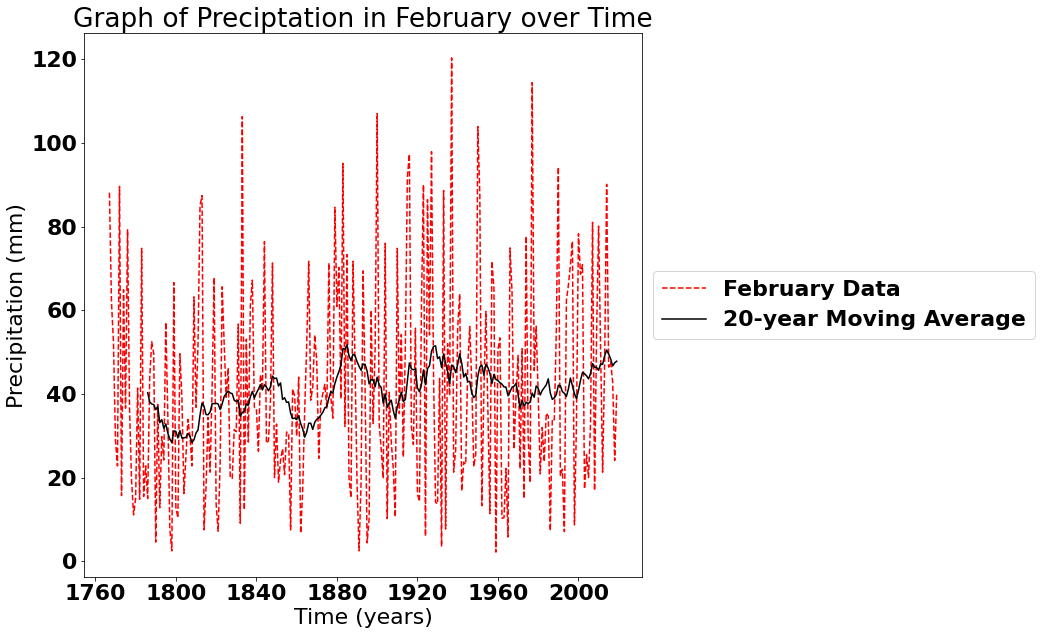

In [32]:
# Let us consider each of the months by themselves
feb_fig, feb_ax = plt.subplots(figsize = (10, 10))
feb_ax.plot(exploratory_df['YYYY'], exploratory_df['Feb'], 'r--', label = 'February Data')
feb_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_Feb_20'], color = 'k', label = '20-year Moving Average')    
feb_ax.set(title = 'Graph of Preciptation in February over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
feb_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

### March

In [33]:
exploratory_df['SMA_Mar_20'] = exploratory_df.Mar.rolling(20).mean()     # calculating a 20 year moving average for March

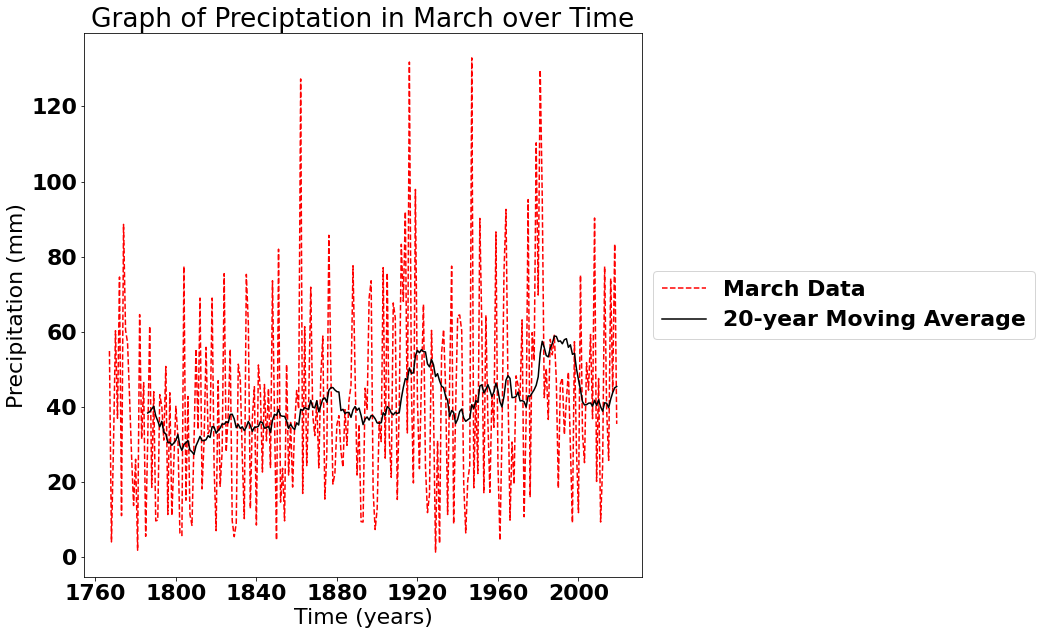

In [34]:
# Let us consider each of the months by themselves
mar_fig, mar_ax = plt.subplots(figsize = (10, 10))
mar_ax.plot(exploratory_df['YYYY'], exploratory_df['Mar'], 'r--', label = 'March Data')
mar_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_Mar_20'], color = 'k', label = '20-year Moving Average')    
mar_ax.set(title = 'Graph of Preciptation in March over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
mar_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### April

In [35]:
exploratory_df['SMA_April_20'] = exploratory_df.Apr.rolling(20).mean()     # calculating a 20 year moving average for April

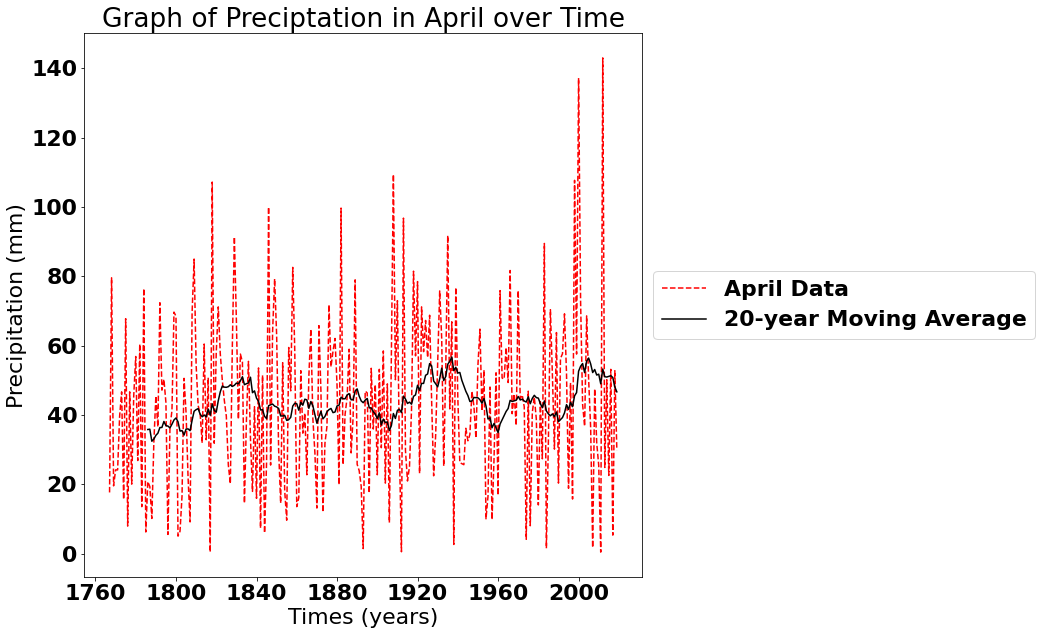

In [36]:
# Let us consider each of the months by themselves
apr_fig, apr_ax = plt.subplots(figsize = (10, 10))
apr_ax.plot(exploratory_df['YYYY'], exploratory_df['Apr'], 'r--', label = 'April Data')
apr_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_April_20'], color = 'k', label = '20-year Moving Average')    
apr_ax.set(title = 'Graph of Preciptation in April over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
apr_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### May

In [37]:
exploratory_df['SMA_May_20'] = exploratory_df.May.rolling(20).mean()     # calculating a 20 year moving average for May

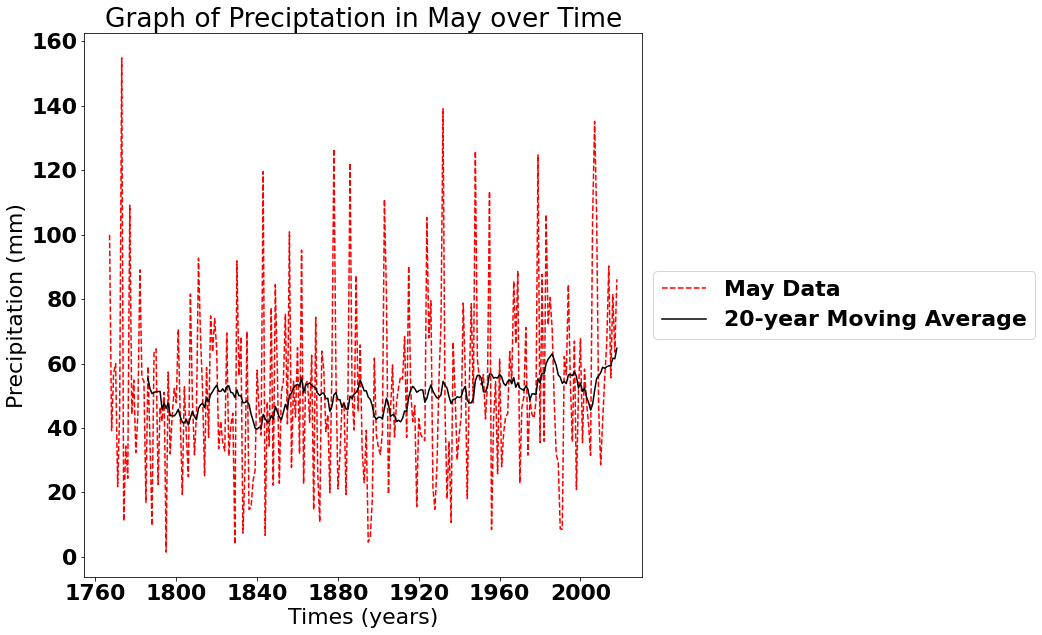

In [38]:
# Let us consider each of the months by themselves
may_fig, may_ax = plt.subplots(figsize = (10, 10))
may_ax.plot(exploratory_df['YYYY'], exploratory_df['May'], 'r--', label = 'May Data')
may_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_May_20'], color = 'k', label = '20-year Moving Average')    
may_ax.set(title = 'Graph of Preciptation in May over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
may_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### June

In [39]:
exploratory_df['SMA_June_20'] = exploratory_df.June.rolling(20).mean()     # calculating a 20 year moving average for June

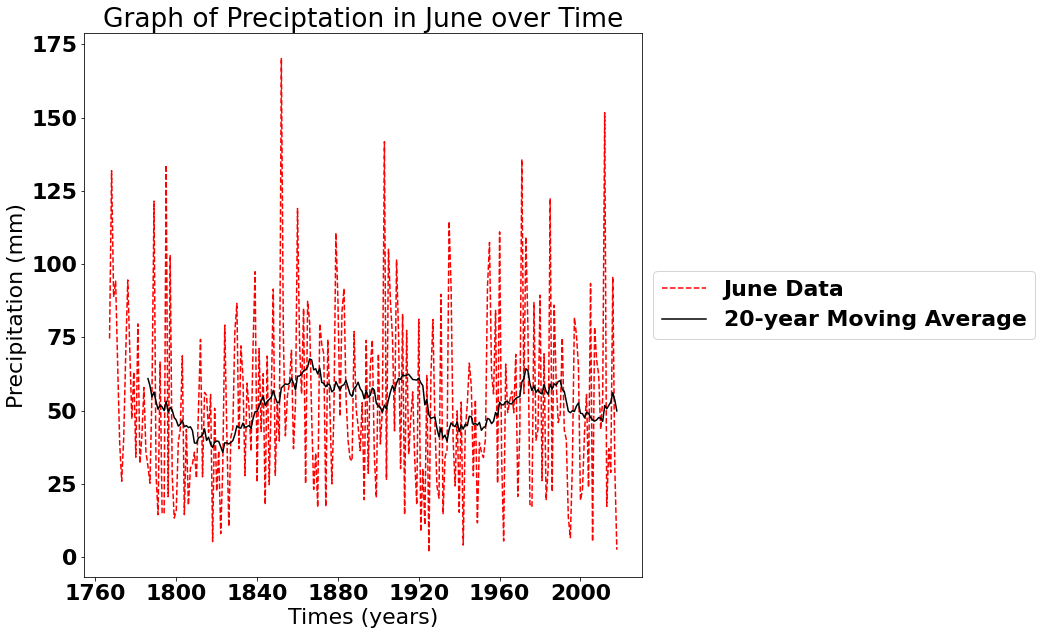

In [40]:
# Let us consider each of the months by themselves
june_fig, june_ax = plt.subplots(figsize = (10, 10))
june_ax.plot(exploratory_df['YYYY'], exploratory_df['June'], 'r--', label = 'June Data')
june_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_June_20'], color = 'k', label = '20-year Moving Average')    
june_ax.set(title = 'Graph of Preciptation in June over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
june_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### July

In [41]:
exploratory_df['SMA_July_20'] = exploratory_df.July.rolling(20).mean()     # calculating a 20 year moving average for July

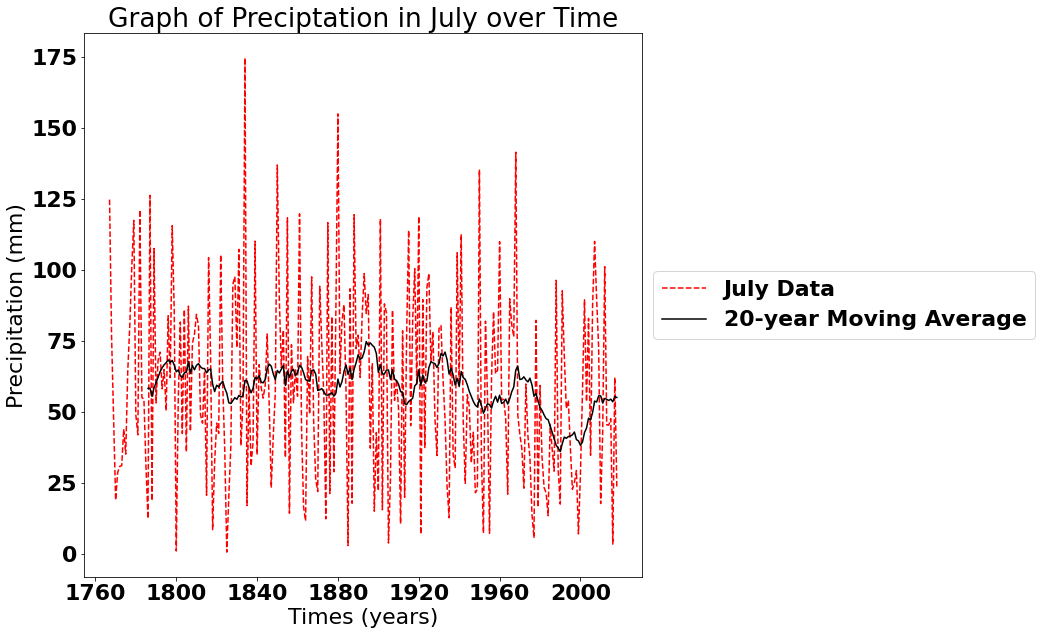

In [42]:
# Let us consider each of the months by themselves
july_fig, july_ax = plt.subplots(figsize = (10, 10))
july_ax.plot(exploratory_df['YYYY'], exploratory_df['July'], 'r--', label = 'July Data')
july_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_July_20'], color = 'k', label = '20-year Moving Average')    
july_ax.set(title = 'Graph of Preciptation in July over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
july_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### August

In [43]:
exploratory_df['SMA_August_20'] = exploratory_df.Aug.rolling(20).mean()     # calculating a 20 year moving average for August

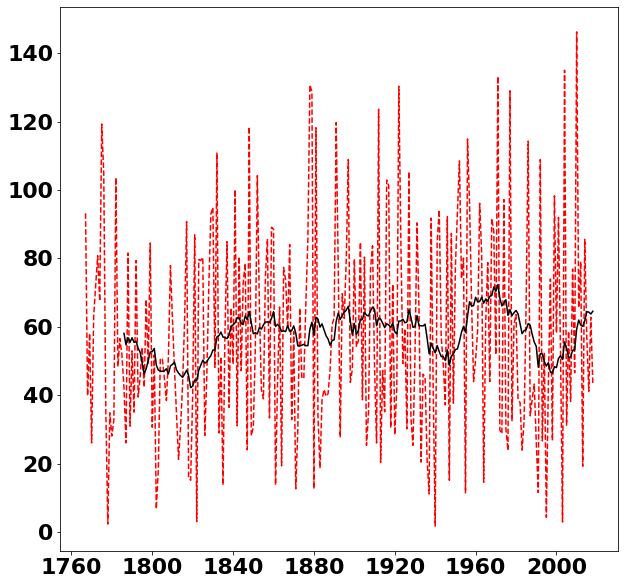

In [44]:
# Let us consider each of the months by themselves
aug_fig, aug_ax = plt.subplots(figsize = (10, 10))
aug_ax.plot(exploratory_df['YYYY'], exploratory_df['Aug'], 'r--', label = 'August Data')
aug_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_August_20'], color = 'k', label = '20-year Moving Average')    
apr_ax.set(title = 'Graph of Preciptation in August over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
apr_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### September

In [45]:
exploratory_df['SMA_September_20'] = exploratory_df.Sept.rolling(20).mean()     # calculating a 20 year moving average for September

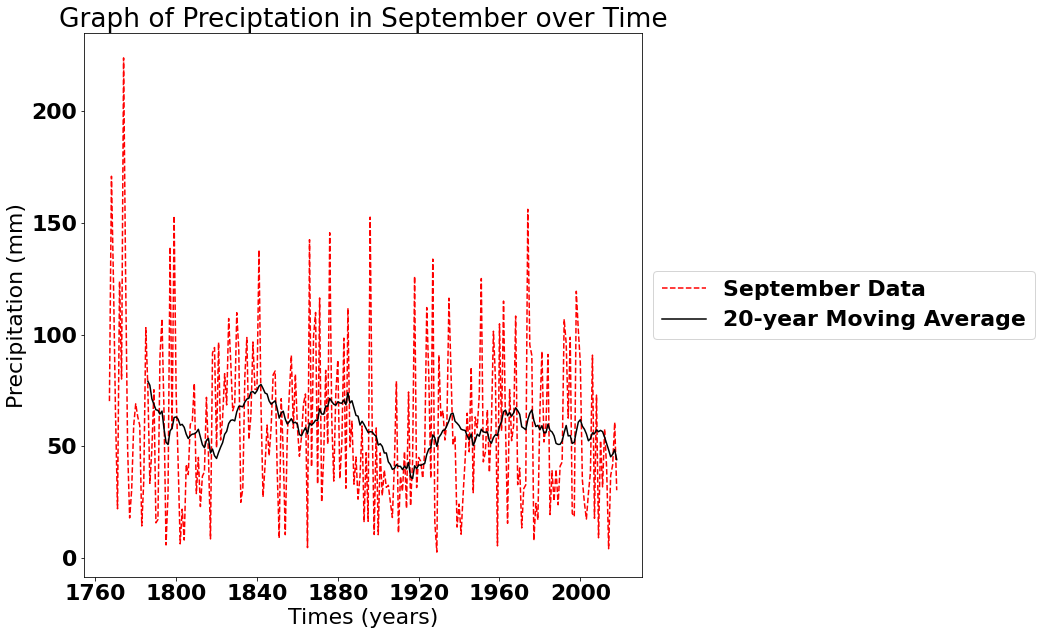

In [46]:
# Let us consider each of the months by themselves
sept_fig, sept_ax = plt.subplots(figsize = (10, 10))
sept_ax.plot(exploratory_df['YYYY'], exploratory_df['Sept'], 'r--', label = 'September Data')
sept_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_September_20'], color = 'k', label = '20-year Moving Average')    
sept_ax.set(title = 'Graph of Preciptation in September over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
sept_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### October

In [47]:
exploratory_df['SMA_October_20'] = exploratory_df.Oct.rolling(20).mean()     # calculating a 20 year moving average for October

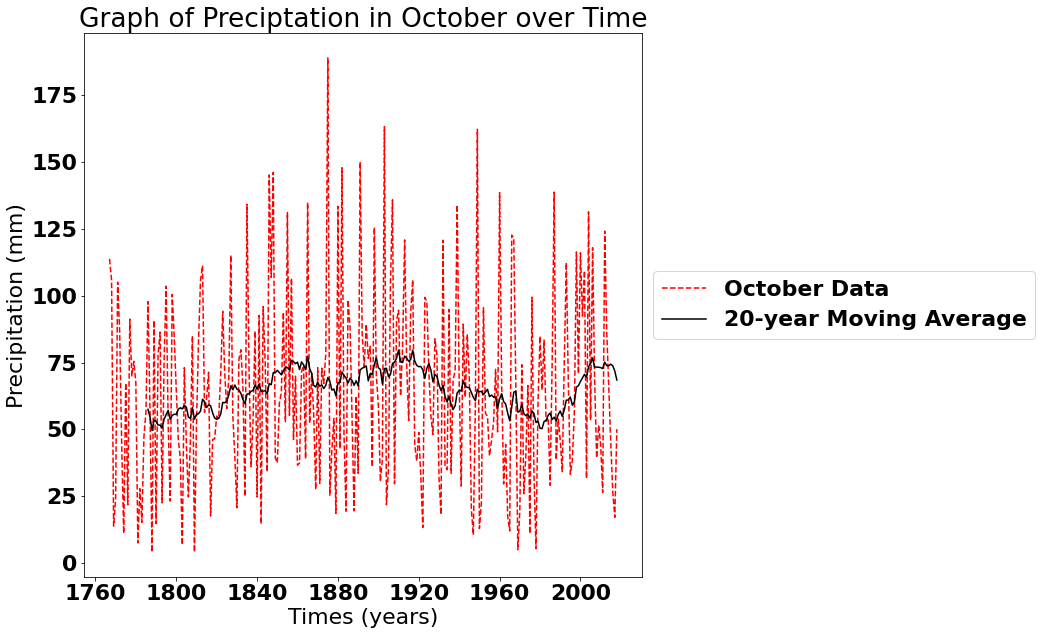

In [48]:
# Let us consider each of the months by themselves
oct_fig, oct_ax = plt.subplots(figsize = (10, 10))
oct_ax.plot(exploratory_df['YYYY'], exploratory_df['Oct'], 'r--', label = 'October Data')
oct_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_October_20'], color = 'k', label = '20-year Moving Average')    
oct_ax.set(title = 'Graph of Preciptation in October over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
oct_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### November

In [49]:
exploratory_df['SMA_November_20'] = exploratory_df.Nov.rolling(20).mean()     # calculating a 20 year moving average for November

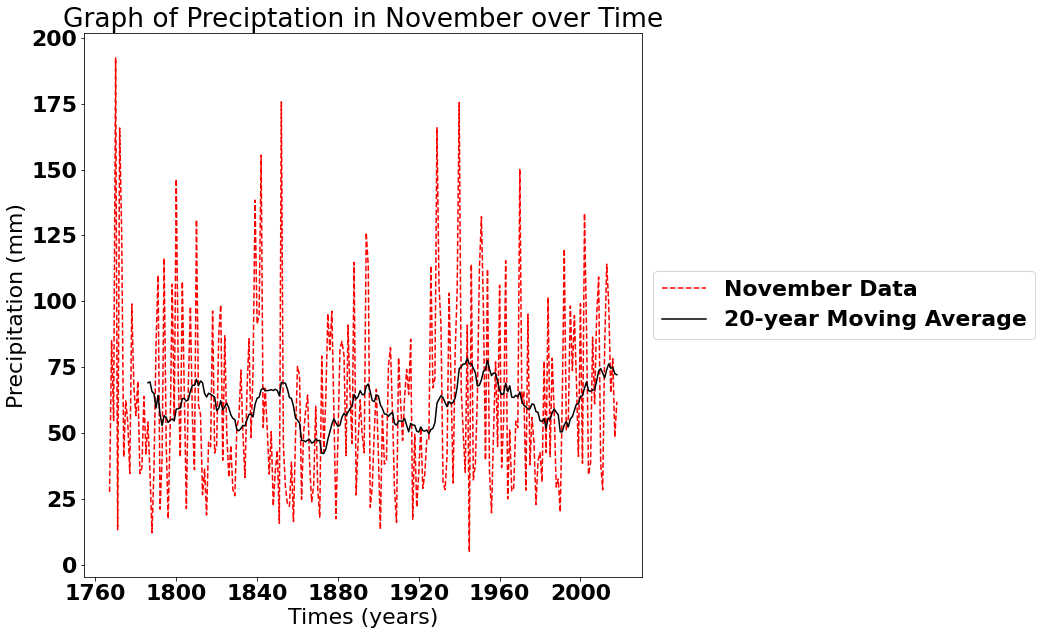

In [50]:
# Let us consider each of the months by themselves
nov_fig, nov_ax = plt.subplots(figsize = (10, 10))
nov_ax.plot(exploratory_df['YYYY'], exploratory_df['Nov'], 'r--', label = 'November Data')
nov_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_November_20'], color = 'k', label = '20-year Moving Average')    
nov_ax.set(title = 'Graph of Preciptation in November over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
nov_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

### December

In [51]:
exploratory_df['SMA_December_20'] = exploratory_df.Dec.rolling(20).mean()     # calculating a 20 year moving average for December

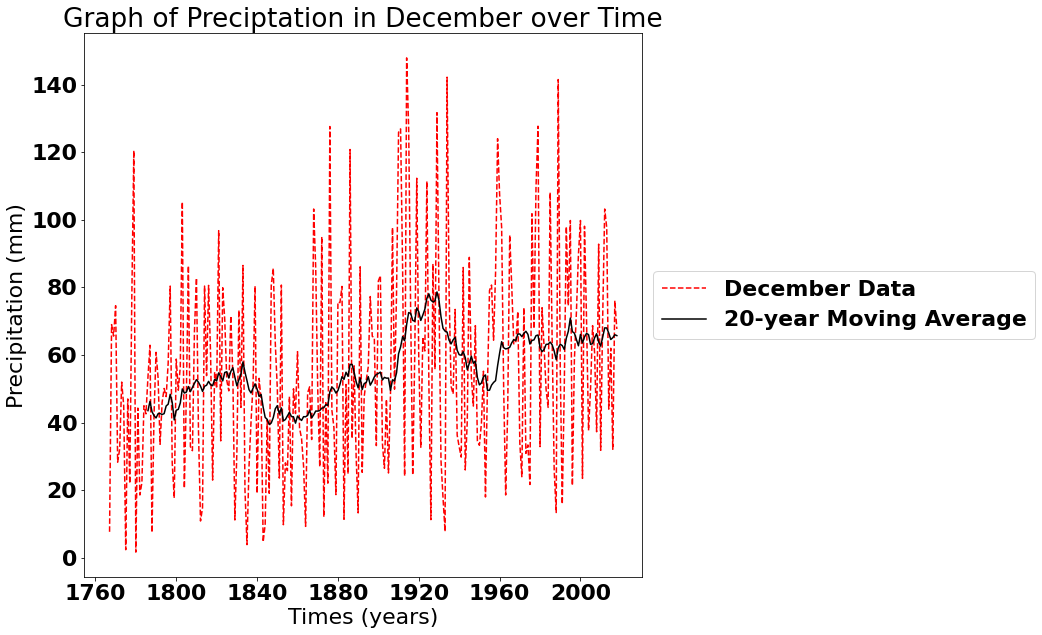

In [52]:
# Let us consider each of the months by themselves
dec_fig, dec_ax = plt.subplots(figsize = (10, 10))
dec_ax.plot(exploratory_df['YYYY'], exploratory_df['Dec'], 'r--', label = 'December Data')
dec_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_December_20'], color = 'k', label = '20-year Moving Average')    
dec_ax.set(title = 'Graph of Preciptation in December over Time', xlabel= 'Times (years)', ylabel='Precipitation (mm)')
dec_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)